In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1 

In [257]:
# Main class for problem 1

lat=34.0784*np.pi/180

class UV_map:
    
    def __init__(self,antpos,du,color,array):

        self.du = du
        self.color = color 
        self.array = array

    def two_d_pos(self):

        self.antpos=antpos[:,:3] 
        self.antpos=self.antpos*1e-9*3e8 #convert to meters, since the file is in ns
        self.nant=self.antpos.shape[0]
        self.nvis=self.nant*(self.nant-1)//2


        #we can look at the antenna array in 2D coordinates by looking at the
        #distance from the zenith.  The following math is useful for converting 3D
        #positions to EW/NS coordinates on the Earth's surface
        zenith1=np.asarray([np.cos(lat),0,np.sin(lat)])
        east1=np.asarray([0,1,0])
        north1=np.cross(zenith1,east1)

        mat=np.vstack([north1,east1,zenith1])
        self.xyz=self.antpos[:,:3]@mat.T

        plt.scatter(self.xyz[:,0],self.xyz[:,1])
        plt.ylabel('North/South [meters]')
        plt.xlabel('East/West [meters]')
        plt.show()

        w = self.xyz[:,2]
        vert_rms = np.sqrt(np.mean(w**2))

        print(f'The rms of the vertical scatter is only {vert_rms:.5f} meters') 
        
        
    def uv(self, deg,t_range):

        uv=np.zeros([self.nvis,2])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv[icur,:]=self.xyz[i,:2]-self.xyz[j,:2]
                icur=icur+1
        uv=np.vstack([uv,-1*uv]) #get the visibility conjugates

        # 3D UV coverage -- takes into account w 
        uv_3d=np.zeros([self.nvis,3])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv_3d[icur,:]=self.antpos[i,:]-self.antpos[j,:]
                icur=icur+1
        uv_3d=np.vstack([uv_3d,-uv_3d])
        theta_range=t_range*2*np.pi/24


        #let's also pick a declination to observe at
        dec=deg*np.pi/180
        zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
        east=np.asarray([0,1,0])
        north=np.cross(zenith,east)

        proj_mat=np.vstack([east,north])

        pad=4
        sz=int(np.max(np.abs(uv_3d))/self.du)
        self.uv_mat=np.zeros([pad*2*sz,2*pad*sz])
        for theta in theta_range:

            # this rotational matrix is converting between (EW/NS) to baselines
            rot_mat=np.zeros([3,3])
            rot_mat[0,0]=np.cos(theta)
            rot_mat[1,1]=np.cos(theta)
            rot_mat[2,2]=1.0
            rot_mat[0,1]=np.sin(theta)
            rot_mat[1,0]=-np.sin(theta)
            uv_rot=uv_3d@rot_mat
            uv_snap=(1/0.21)*uv_rot@proj_mat.T
            plt.plot(uv_snap[:,0],uv_snap[:,1],self.color)
            uv_int=np.asarray(uv_snap/self.du,dtype='int')
            for i in range(uv_snap.shape[0]):
                self.uv_mat[uv_int[i,0],uv_int[i,1]]=self.uv_mat[uv_int[i,0],uv_int[i,1]]+1
                
        plt.ylabel('Wavelengths')
        plt.xlabel('Wavelengths')
        plt.title(f'Declination: {deg} deg')
        plt.show()
                
    def dirty_beam(self):
        beam=np.abs(np.fft.ifft2(self.uv_mat))
        x0=beam.shape[0]//2
        dx=100
  
        plt.imshow(np.fft.fftshift(beam))
        plt.xlim([x0-dx,x0+dx])
        plt.ylim([x0-dx,x0+dx])
        plt.colorbar()
        plt.show()
        

## Array D 

I will do all parts in this problem for configuration D first, and then I'll do configuration A (labeled below).

### a)

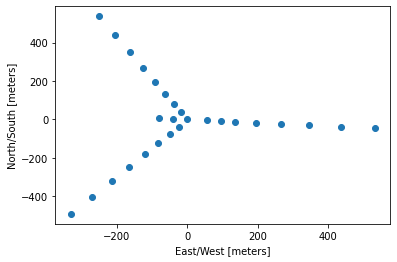

The rms of the vertical scatter is only 0.83595 meters


In [258]:
antpos=np.loadtxt('vla_d_array.txt',usecols=range(4))
du=2.0
color='b.'
array='d'

UV_d = UV_map(antpos,du,color,array)
UV_d.two_d_pos()

### b) 

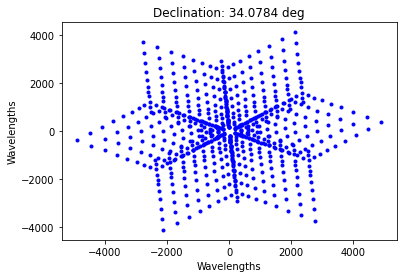

In [259]:
# Do shot of overhead
t_range = np.array([0])
UV_d.uv(34.0784,t_range)

### c)

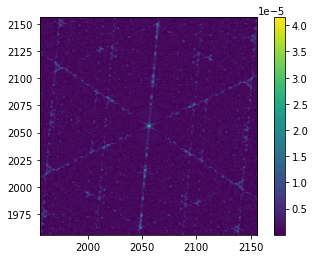

In [58]:
UV_d.dirty_beam()

### d) and e) 

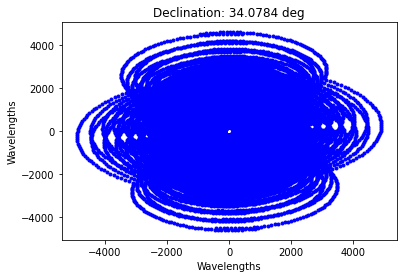

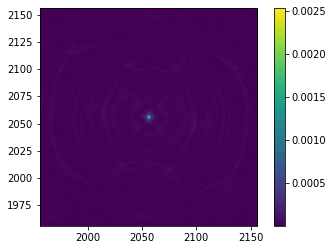

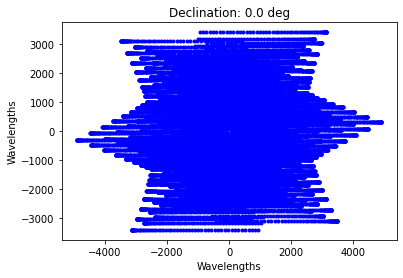

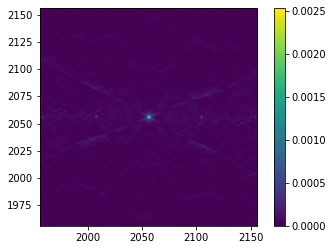

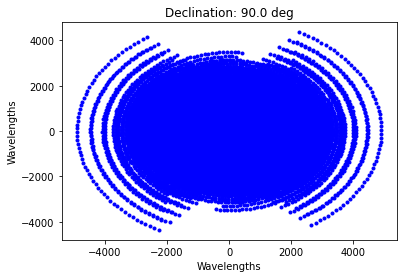

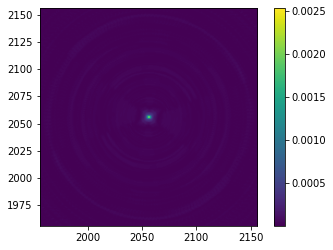

In [51]:
# source overhead
UV_d.uv(deg=34.0784,t_range =np.linspace(-4,4,61))
UV_d.dirty_beam()

# source at equator 
UV_d.uv(deg=00.0,t_range =np.linspace(-4,4,61))
UV_d.dirty_beam()

# source at North celestial pole 
UV_d.uv(deg=90.0,t_range =np.linspace(-4,4,61))
UV_d.dirty_beam()


## Array A 

### a) 

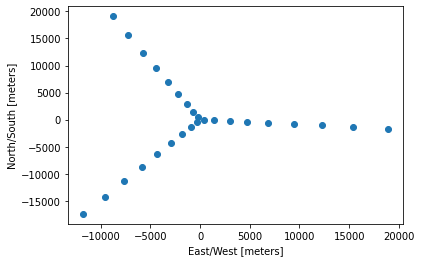

The rms of the vertical scatter is only 19.15570 meters


In [53]:
antpos=np.loadtxt('vla_a_array.txt')
du=40.0
color='k.'
array='a'

UV_a = UV_map(antpos,du,color, array)
UV_a.two_d_pos()

### b)

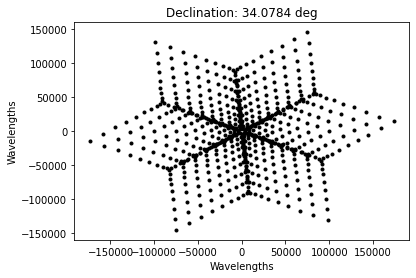

In [54]:
UV_a.uv(deg=34.0784,t_range = np.array([0]))

### c)

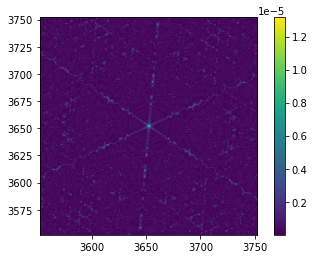

In [55]:
UV_a.dirty_beam()

### d) and e)

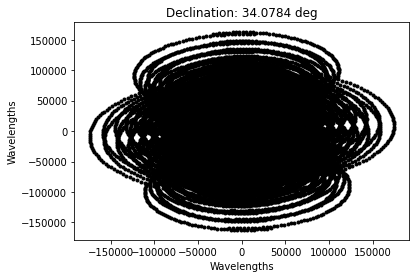

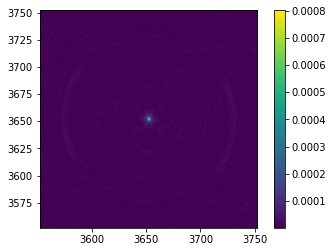

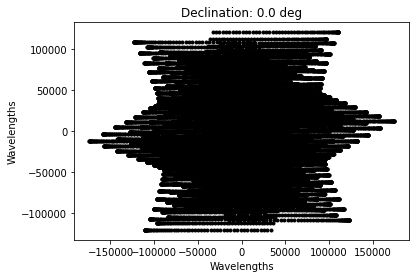

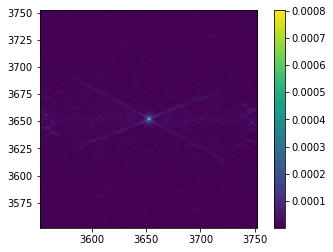

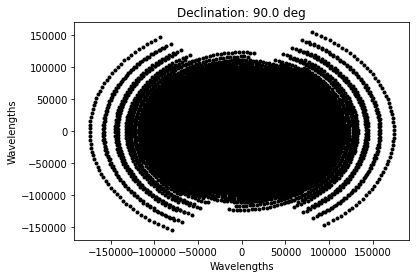

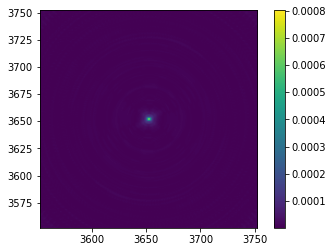

In [59]:
# source overhead
UV_a.uv(deg=34.0784,t_range =np.linspace(-4,4,61))
UV_a.dirty_beam()

# source at equator 
UV_a.uv(deg=00.0,t_range =np.linspace(-4,4,61))
UV_a.dirty_beam()

# source at North celestial pole 
UV_a.uv(deg=90.0,t_range =np.linspace(-4,4,61))
UV_a.dirty_beam()

## Problem 2

In [467]:
# Main class for problem 2

lat=34.0784*np.pi/180

class UV_map_2:
    
    def __init__(self,antpos,du,color,array):

        self.du = du
        self.color = color 
        self.array = array

    def two_d_pos(self):

        self.antpos=antpos[:,:3] 
        self.antpos=self.antpos*1e-9*3e8 #convert to meters, since the file is in ns
        self.nant=self.antpos.shape[0]
        self.nvis=self.nant*(self.nant-1)//2


        #we can look at the antenna array in 2D coordinates by looking at the
        #distance from the zenith.  The following math is useful for converting 3D
        #positions to EW/NS coordinates on the Earth's surface
        zenith1=np.asarray([np.cos(lat),0,np.sin(lat)])
        east1=np.asarray([0,1,0])
        north1=np.cross(zenith1,east1)

        mat=np.vstack([north1,east1,zenith1])
        self.xyz=self.antpos[:,:3]@mat.T

        w = self.xyz[:,2]
        vert_rms = np.sqrt(np.mean(w**2))

        
    def path_length(self,deg,freq):
        

        dec=deg*np.pi/180
        lam = 2.9979e8/(1e9*freq)
        
        #make a vector of the latitude 
        vec_theta = np.array([np.sin(dec), 0, np.cos(dec)])
        
        uv=np.zeros([self.nvis,2])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv[icur,:]=self.xyz[i,:2]-self.xyz[j,:2]
                icur=icur+1
        uv=np.vstack([uv,-1*uv]) #get the visibility conjugates

        # 3D UV coverage -- takes into account w 
        uv_3d=np.zeros([self.nvis,3])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv_3d[icur,:]=self.antpos[i,:]-self.antpos[j,:]
                icur=icur+1
        uv_3d=np.vstack([uv_3d,-uv_3d])
        theta =0*2*np.pi/24
        
        zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
        east=np.asarray([0,1,0])
        north=np.cross(zenith,east)

        proj_mat=np.vstack([east,north])

        pad=4
        sz=int(np.max(np.abs(uv_3d))/self.du)
        self.uv_mat=np.zeros([pad*2*sz,2*pad*sz])

        # this rotational matrix is converting between (EW/NS) to baselines
        rot_mat=np.zeros([3,3])
        rot_mat[0,0]=np.cos(theta)
        rot_mat[1,1]=np.cos(theta)
        rot_mat[2,2]=1.0
        rot_mat[0,1]=np.sin(theta)
        rot_mat[1,0]=-np.sin(theta)
        uv_rot=uv_3d@rot_mat
        threed_path = np.dot(uv_rot,vec_theta)
        print()

        # 2d paths 
        uv_snap=uv_rot@proj_mat.T
        twod_path = np.dot(uv_snap,vec_theta[:2])

        #plt.plot(uv_snap[:,0],uv_snap[:,1],self.color)
        uv_int=np.asarray(uv_snap/self.du,dtype='int')
        for i in range(uv_snap.shape[0]):
            self.uv_mat[uv_int[i,0],uv_int[i,1]]=self.uv_mat[uv_int[i,0],uv_int[i,1]]+1
                
        return twod_path*(1/lam),threed_path*(1/lam)
    
    def phase(self,deg,freq,fwhm):
        
        lam = 2.9979e8/(1e9*freq)
        
        # source on center
        PL_2d1,PL_3d1 = self.path_length(deg,freq)
        
        # source 30' to south
        PL_2d2,PL_3d2 = self.path_length(deg-fwhm,freq)
        
        PLD_2d = np.abs(PL_2d1-PL_2d2)
        PLD_3d = np.abs(PL_3d1-PL_3d2)

        phi_2d = 2*np.pi*PLD_2d
        phi_3d = 2*np.pi*PLD_3d
        
        diff = abs(np.sqrt(np.mean(phi_2d**2)) - np.sqrt(np.mean(phi_3d**2)))
        print(f'The difference in RMS of the phases from the 2D and 3D UV positions: {diff:.3f} wavlengths')


### a)

The field of view is set by the diffraction-limited response of the individual antennas. We can use the Rayleigh Ctierion to determine the field of view for each frequency. The Rayleigh ctierion states: 

$
\theta = \frac{1.22 \lambda}{D} 
$

For $\nu =$ 1.4 GHz we get a field of view of: 

$
\theta = \frac{1.22*0.21 m}{25m} = 35.23 \rm{arcmin}
$

For $\nu =$ 8 GHz we get a field of view of: 

$
\theta = \frac{1.22*0.037 m}{25m} = 6.2 \rm{arcmin}
$

For the FWHM in the next few parts, I used the published VLA values for each configuration.

## Array d for 1.4 GHz

### parts b) and c)

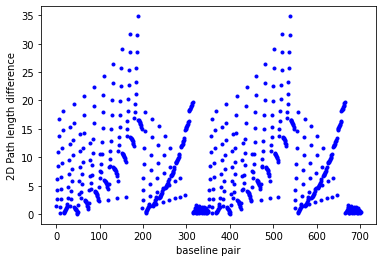

The difference in RMS of the path length differences from the 2D and 3D UV positions: 0.406 wavlengths


In [468]:
antpos=np.loadtxt('vla_d_array.txt',usecols=range(4))
du=2.0
color='b.'
array='d'
#fwhm = 0.01278 #in deg
fwhm = 0.5

UV_d = UV_map_2(antpos,du,color,array)
UV_d.two_d_pos()

# get the lengths for the overhead and to the south 
PL_2d1,PL_3d1 = UV_d.path_length(34.0784,1.4)
PL_2d2,PL_3d2 = UV_d.path_length(34.0784-0.5 ,1.4)

PLD_2d = np.abs(PL_2d1-PL_2d2)
PLD_3d = np.abs(PL_3d1-PL_3d2)

plt.plot(PLD_2d,color)
plt.xlabel('baseline pair')
plt.ylabel('2D Path length difference')
plt.show()

diff = abs(np.sqrt(np.mean(PLD_2d**2)) - np.sqrt(np.mean(PLD_3d**2)))

print(f'The difference in RMS of the path length differences from the 2D and 3D UV positions: {diff:.3f} wavlengths')

## Array a for 1.4 GHz

### parts b) and c)

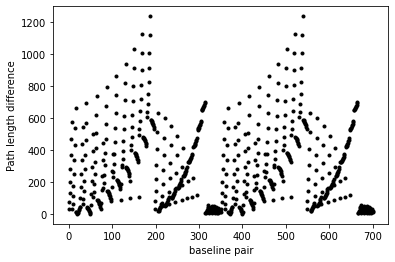

The difference in RMS of the path length differences from the 2D and 3D UV positions: 11.869 wavlengths


In [469]:
antpos=np.loadtxt('vla_a_array.txt')
du=40.0
color='k.'
array='a'
#fwhm = 3.61e-4 #in deg
fwhm = 0.5 

UV_a = UV_map_2(antpos,du,color,array)
UV_a.two_d_pos()
PL_2d1,PL_3d1 = UV_a.path_length(34.0784,1.4)
PL_2d2,PL_3d2 = UV_a.path_length(33.5784,1.4)

PLD_2d = np.abs(PL_2d1-PL_2d2)
PLD_3d = np.abs(PL_3d1-PL_3d2)

plt.plot(PLD_2d,color)
plt.xlabel('baseline pair')
plt.ylabel('Path length difference')
plt.show()

diff = abs(np.sqrt(np.mean(PLD_2d**2)) - np.sqrt(np.mean(PLD_3d**2)))

print(f'The difference in RMS of the path length differences from the 2D and 3D UV positions: {diff:.3f} wavlengths')

### d) 

### Array d, source overhead, 1.4 GHz

In [470]:
antpos=np.loadtxt('vla_d_array.txt',usecols=range(4))
du=2.0
color='b.'
array='d'
#fwhm = 0.01278
fwhm = 0.5

UV_d = UV_map_2(antpos,du,color,array)
UV_d.two_d_pos()
UV_d.phase(34.1,1.4,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 2.582 wavlengths


### Array d, source at the equator, 1.4 GHz

In [471]:
UV_d.phase(00.0,1.4,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 39.957 wavlengths


### Array d, source overhead, 8 GHz

In [472]:
UV_d.phase(34.1,8,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 14.753 wavlengths


### Array d, source at the equator, 8 GHz

In [473]:
UV_d.phase(00.0,8,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 228.325 wavlengths


### Array a, source overhead, 1.4 GHz

In [474]:
antpos=np.loadtxt('vla_a_array.txt')
du=40.0
color='k.'
array='a'
#fwhm = 3.61e-4 #deg
fwhm = 0.5

UV_a = UV_map_2(antpos,du,color,array)
UV_a.two_d_pos()
UV_a.phase(34.1,1.4,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 75.576 wavlengths


### Array a, source at the equator, 1.4 GHz

In [475]:
UV_a.phase(0,1.4,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 1429.766 wavlengths


### Array a, source overhead, 8 GHz

In [476]:
UV_a.phase(34.1,8,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 431.861 wavlengths


### Array a, source at the equator, 8 GHz

In [477]:
UV_a.phase(0,8,fwhm)



The difference in RMS of the phases from the 2D and 3D UV positions: 8170.092 wavlengths


When we really need to worry about this problem is at the higher frequencies (8GHz more so than 1.4GHz) and when we are observing sources at a lower latitude (closer to the equator versus closer to zenith).

The RMS of the phases is larger than I expect, I get better answers when I use the FWHM as 30 arcmin.

## Problem 3

In [517]:
# Main class for problem 3

import matplotlib.cm as cm
from matplotlib.cm import get_cmap

lat=34.0784*np.pi/180

class UV_map_3:
    
    def __init__(self,antpos,du,color,array):

        self.du = du
        self.color = color 
        self.array = array

    def two_d_pos(self):

        self.antpos=antpos[:,:3] 
        self.antpos=self.antpos*1e-9*3e8 #convert to meters, since the file is in ns
        self.nant=self.antpos.shape[0]
        self.nvis=self.nant*(self.nant-1)//2


        #we can look at the antenna array in 2D coordinates by looking at the
        #distance from the zenith.  The following math is useful for converting 3D
        #positions to EW/NS coordinates on the Earth's surface
        zenith1=np.asarray([np.cos(lat),0,np.sin(lat)])
        east1=np.asarray([0,1,0])
        north1=np.cross(zenith1,east1)

        mat=np.vstack([north1,east1,zenith1])
        self.xyz=self.antpos[:,:3]@mat.T

        w = self.xyz[:,2]
        vert_rms = np.sqrt(np.mean(w**2))
        
    def uv_change(self,deg,t_range,freq):

        lam_range = 2.9979e8/(1e9*freq)

        uv=np.zeros([self.nvis,2])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv[icur,:]=self.xyz[i,:2]-self.xyz[j,:2]
                icur=icur+1
        uv=np.vstack([uv,-1*uv]) #get the visibility conjugates

        # 3D UV coverage -- takes into account w 
        uv_3d=np.zeros([self.nvis,3])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv_3d[icur,:]=self.antpos[i,:]-self.antpos[j,:]
                icur=icur+1
        uv_3d=np.vstack([uv_3d,-uv_3d])
        theta=t_range*2*np.pi/24


        #let's also pick a declination to observe at
        dec=deg*np.pi/180
        zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
        east=np.asarray([0,1,0])
        north=np.cross(zenith,east)

        proj_mat=np.vstack([east,north])

        vec_theta = np.array([np.sin(dec), 0, np.cos(dec)])

        pad=4
        sz=int(np.max(np.abs(uv_3d))/self.du)
        self.uv_mat=np.zeros([pad*2*sz,2*pad*sz])
        for i in range(lam_range.shape[0]):

        #print(f'Frequecy:{freq[i]} GHz')
        # this rotational matrix is converting between (EW/NS) to baselines
            rot_mat=np.zeros([3,3])
            rot_mat[0,0]=np.cos(theta)
            rot_mat[1,1]=np.cos(theta)
            rot_mat[2,2]=1.0
            rot_mat[0,1]=np.sin(theta)
            rot_mat[1,0]=-np.sin(theta)
            uv_rot=uv_3d@rot_mat
            uv_snap=(1/lam_range[i])*uv_rot@proj_mat.T

            twod_path = np.dot(uv_snap,vec_theta[:2])
            plt.scatter(uv_snap[:,0],uv_snap[:,1],marker ='.',label=f'Frequecy:{freq[i]:.2f} GHz',alpha =0.6)
            uv_int=np.asarray(uv_snap/self.du,dtype='int')
            for i in range(uv_snap.shape[0]):
                self.uv_mat[uv_int[i,0],uv_int[i,1]]=self.uv_mat[uv_int[i,0],uv_int[i,1]]+1

        #cb = plt.colorbar(im, orientation='vertical',label='lam')
        plt.ylabel('Wavelengths')
        plt.xlabel('Wavelengths')
        plt.title(f'Declination: {deg} deg')
        #plt.colorbar()
        plt.legend()
        plt.show()
        
        
    def path_length(self,deg,freq):
        
        lam = 2.9979e8/(1e9*freq)

        uv=np.zeros([self.nvis,2])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv[icur,:]=self.xyz[i,:2]-self.xyz[j,:2]
                icur=icur+1
        uv=np.vstack([uv,-1*uv]) #get the visibility conjugates

        # 3D UV coverage -- takes into account w 
        uv_3d=np.zeros([self.nvis,3])
        icur=0
        for i in range(self.nant):
            for j in range(i+1,self.nant):
                uv_3d[icur,:]=self.antpos[i,:]-self.antpos[j,:]
                icur=icur+1
        uv_3d=np.vstack([uv_3d,-uv_3d])
        theta=t_range*2*np.pi/24


        #let's also pick a declination to observe at
        dec=deg*np.pi/180
        
        zenith=np.asarray([np.cos(dec),0,np.sin(dec)])
        east=np.asarray([0,1,0])
        north=np.cross(zenith,east)

        proj_mat=np.vstack([east,north])
        vec_theta = np.array([np.sin(dec), 0, np.cos(dec)])

        pad=4
        sz=int(np.max(np.abs(uv_3d))/self.du)
        self.uv_mat=np.zeros([pad*2*sz,2*pad*sz])
        #for i in range(lam_range.shape[0]):
            
        #print(f'Frequecy:{freq} GHz')
        # this rotational matrix is converting between (EW/NS) to baselines
        rot_mat=np.zeros([3,3])
        rot_mat[0,0]=np.cos(theta)
        rot_mat[1,1]=np.cos(theta)
        rot_mat[2,2]=1.0
        rot_mat[0,1]=np.sin(theta)
        rot_mat[1,0]=-np.sin(theta)
        uv_rot=uv_3d@rot_mat
        uv_snap=uv_rot@proj_mat.T

        twod_path = np.dot(uv_snap,vec_theta[:2])
        #plt.scatter(uv_snap[:,0],uv_snap[:,1],marker ='.',label=f'Frequecy:{freq[i]:.2f} GHz',alpha =0.6)
        uv_int=np.asarray(uv_snap/self.du,dtype='int')
        for i in range(uv_snap.shape[0]):
            self.uv_mat[uv_int[i,0],uv_int[i,1]]=self.uv_mat[uv_int[i,0],uv_int[i,1]]+1

        return twod_path*(1/lam)
        
        
    def mult_freq(self,deg,freq,fwhm):
            
        lam = 2.9979e8/(1e9*freq)

        # source on center
        PL_2d1= self.path_length(deg,freq)

        # source 30' to south
        PL_2d2 = self.path_length(deg-fwhm,freq)

        PLD_2d = np.abs(PL_2d1-PL_2d2)
        rms = np.sqrt(np.mean(PLD_2d**2))

        return rms


## Array d)

Since we are working with a source directly overhead and we are at 1.4 GHz, I am going to ignore the w term and use the 2D path length difference, which is a good approximation as we saw above. First I'll show how changing the frequency changes the UV coordinates in wavlength space. Below shows how the coordinates change with different frequencies. We'll be searching for a radius in this UV space that represents an angular extent to restrict the field of view in order to avoid band smearing.

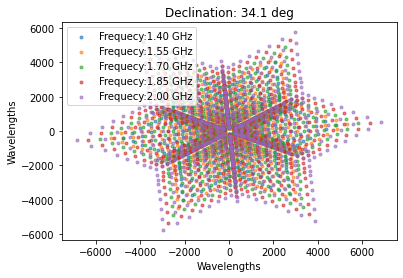

In [518]:
# Example of the UV coordinates changing with frequency

antpos=np.loadtxt('vla_d_array.txt',usecols=range(4))
du=2.0
color='b.'
array='d'
fwhm = 0.5

freq_range = np.linspace(1.4,2,5)

UV_d = UV_map_3(antpos,du,color,array)
UV_d.two_d_pos()
UV_d.uv_change(34.1,np.array([0]),freq_range)



I use an iterative approach and adjust the frequency changes to see how the differences in the RMS of the path lengths respond. I find when they equal $1/2 \pi$ in wavelength units.

In [495]:
antpos=np.loadtxt('vla_d_array.txt',usecols=range(4))
du=2.0
color='b.'
array='d'
fwhm = 0.5

UV_d = UV_map_3(antpos,du,color,array)
UV_d.two_d_pos()

freq_range = np.linspace(1.4,15,670)

pl =[]
for i in freq_range:
    pl.append(UV_d.mult_freq(34.1,i,fwhm))
    
diff =[]
for i in range(len(pl)-1):
    diff.append(pl[i+1]-pl[i])
    
nu =[]
for i in range(freq_range.shape[0]-1):
    nu.append(freq_range[i+1]-freq_range[i])

print(f'Change of RMS of path length difference is {np.mean(diff):.5f} which corresponds to a delta nu of {np.mean(nu):.5f} GHz')

Change of RMS of path length difference is 0.15920 which corresponds to a delta nu of 0.02033 GHz


For array d, the bandwidth is 20.33 MHz to make the path length difference in wavelengths change by $1/2 \pi$ or 0.159. It represents a radial extent in the UV plane.

## Array a)

In [514]:
antpos=np.loadtxt('vla_a_array.txt')
du=40.0
color='k.'
array='a'
fwhm = 0.5 

UV_a = UV_map_3(antpos,du,color,array)
UV_a.two_d_pos()

freq_range = np.linspace(1.4,5,6500)

pl =[]
for i in freq_range:
    pl.append(UV_a.mult_freq(34.1,i,fwhm))
    
diff =[]
for i in range(len(pl)-1):
    diff.append(pl[i+1]-pl[i])
    
nu =[]
for i in range(freq_range.shape[0]-1):
    nu.append(freq_range[i+1]-freq_range[i])

print(f'Change of RMS of path length difference is {np.mean(diff):.5f} which corresponds to a delta nu of {np.mean(nu):.5f} GHz')

Change of RMS of path length difference is 0.15388 which corresponds to a delta nu of 0.00055 GHz


For array a, the bandwidth is ~0.55 MHz to make the path length difference in wavelengths change by $1/2 \pi$ or 0.159. It represents a radial extent in the UV plane.

## Problem 4

### a)

If we are assuming all of the sources are evenly distributed and have the same brightness we can use the following information to see how the number of sources above a certain flux limit scales with the flux:

$
S_{flux} \propto r^2 
$ 

$
S_{flux}^{-2} \propto r 
$ 

Since the sources are distributed equally we can count them as a function of the radius if we imagine a volume expanding and counting more sources:

$
N \propto V \propto r^{3} 
$

We can combine these and get a relationship between the number of sources and the flux density: 

$ 
N \propto S_{flux}^{-3/2}
$

The above equation tells us that if we make a plot of the number of sources above a flux limit versus the flux limit, the power law would go as -3/2.

### b)

From Jon's notes, get an approximate expression for the flux level in terms of the known confusion limit of FIRST:

$ 
S_{new} = \sqrt{N_{FIRST}(\theta_{FIRST}/ \theta_{new})^2} \times S_{FIRST}
$

Where $N_{FIRST}$ is the number of sources above some flux limit $S_{FIRST}$ at a given frequency and theta is the beam size: 

$
\theta = \frac{1.22 \lambda}{d}
$


In [555]:
def confused(d):
    theta_new = ((1.22*0.21)/d)*(3438) # convert to arcmin 
    N = np.sqrt(100*(theta_new/60)**2) * 1 # in mJy
    return N


#GBT
print(f'confusion limit for GBT is {confused(80):.3f} mJy')

# FAST 
print(f'confusion limit for FAST is {confused(300):.3f} mJy')

# VLA-D
print(f'confusion limit for VLA-d array is is {confused(36400):.3f} mJy')

# VLA-A
print(f'confusion limit for VLA-d array is is {confused(1030):.3f} mJy')


confusion limit for GBT is 1.835 mJy
confusion limit for FAST is 0.489 mJy
confusion limit for VLA-d array is is 0.004 mJy
confusion limit for VLA-d array is is 0.143 mJy


### c)

Using the radiometer equation we can solve for the integration time to reach the limit:

$ 
t =( \frac{T}{dT})^2 \frac{1}{B}
$

$dT$ can be calculated taking the confusion limit calculated in part (b) and multiplying it by the gain given by: 

$
gain = \frac{A_{eff}}{2k} 
$

In [556]:

def time(d):
    a_eff = (np.pi*(d/2)**2)*.7
    k_b = 1300 # in units of m^2 Jy/K
    gain = a_eff /(2* k_b) # in units of K/Jy
    flux = confused(d)*1e-3 # flux limit in units of Jy
    
    t = (25/(flux*gain))**2 * (1/500e6)
    
    return t 


#GBT
print(f'Integration time for GBT is {time(80):.5f} sec')

# FAST 
print(f'Integration time for FAST is {time(300):.5f} sec')

# VLA-D
print(f'Integration time for VLA-d array is is {time(36400):.9f} sec')

# VLA-A
print(f'Integration limit for VLA-d array is is {time(1030):.5f} sec')

Integration time for GBT is 0.20269 sec
Integration time for FAST is 0.01441 sec
Integration time for VLA-d array is is 0.000000979 sec
Integration limit for VLA-d array is is 0.00122 sec


### d)

Re-do for an observing frequency of 8 GHz and a bandwidth of 2GHz.

In [561]:
def confused_8ghz(d):
    theta_new = ((1.22*0.037)/d)*(3438) # convert to arcmin 
    N = np.sqrt(100*(theta_new/60)**2) * (8/1.4)**(-.8) # in mJy- scaled to 8GHz
    return N


#GBT
print(f'confusion limit for GBT is {confused_8ghz(80):.3f} mJy')

# FAST 
print(f'confusion limit for FAST is {confused_8ghz(300):.3f} mJy')

# VLA-D
print(f'confusion limit for VLA-d array is is {confused_8ghz(36400):.5f} mJy')

# VLA-A
print(f'confusion limit for VLA-d array is is {confused_8ghz(1030):.3f} mJy')



confusion limit for GBT is 0.080 mJy
confusion limit for FAST is 0.021 mJy
confusion limit for VLA-d array is is 0.00018 mJy
confusion limit for VLA-d array is is 0.006 mJy


In [560]:

def time(d):
    a_eff = (np.pi*(d/2)**2)*.7
    k_b = 1300 # in units of m^2 Jy/K
    gain = a_eff / (2*k_b) # in units of K/Jy
    flux = confused_8ghz(d)*1e-3 # flux limit in units of Jy
    
    t = (25/(flux*gain))**2 * (1/2e9)
    
    return t 


#GBT
print(f'Integration time for GBT is {time(80):.5f} sec')

# FAST 
print(f'Integration time for FAST is {time(300):.5f} sec')

# VLA-D
print(f'Integration time for VLA-d array is is {time(36400):.9f} sec')

# VLA-A
print(f'Integration limit for VLA-d array is is {time(1030):.5f} sec')

Integration time for GBT is 26.54286 sec
Integration time for FAST is 1.88749 sec
Integration time for VLA-d array is is 0.000128211 sec
Integration limit for VLA-d array is is 0.16012 sec


It takes longer to integrate down to the confusion limit using an observing frequency of 8 GHz